In [95]:
""" importamos libreriaS """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Objetivo

Crear variables a partir de los datos de serie de tiempo para utilizarlos en predicciones con redes neuronales

In [96]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUIt0M8NAo8HzjEcPXDQ3UheoaHg_4DPzkY_I-1kWT5tXgKlgclViv0nrcpdym2g/pub?gid=1410684387&single=true&output=csv'

In [97]:
df = pd.read_csv(link)

df = pd.read_csv(link, index_col='ciclo', )


In [98]:
# selecciono features

df = df.loc[df.Activo_id==1,['s2']]
df.head()

,s2
ciclo,
1,641.82
2,642.15
3,642.35
4,642.35
5,642.37


Plot de las variables en el tiempo("Ciclo")

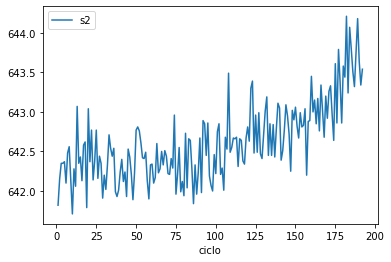

In [99]:
df.plot()

In [100]:
melt = df.copy()

In [101]:
melt.head()

,s2
ciclo,
1,641.82
2,642.15
3,642.35
4,642.35
5,642.37


# Escalamiento

In [102]:
# escalando las variables

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
melt = pd.DataFrame(scaler.fit_transform(melt))

In [103]:
melt.columns=['s2']

# generamos predictores

In [104]:
melt['t-1'] = melt['s2'].shift(1)
melt['diff_1'] = melt['s2'].diff(1)
melt['MA_4']= melt['s2'].rolling(4).mean()
melt['vf'] = melt['s2'].shift(-1)
melt['vf2'] = melt['s2'].shift(-2)
melt['vf3'] = melt['s2'].shift(-3)
melt['vf4'] = melt['s2'].shift(-4)
melt['vf5'] = melt['s2'].shift(-5)
melt['vf6'] = melt['s2'].shift(-6)
melt['vf7'] = melt['s2'].shift(-7)
melt.head()

,s2,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6,vf7
0,0.044,NaN,NaN,NaN,0.176,0.256,0.256,0.264,0.156,0.308,0.340
1,0.176,0.044,0.132,NaN,0.256,0.256,0.264,0.156,0.308,0.340,0.164
2,0.256,0.176,0.080,NaN,0.256,0.264,0.156,0.308,0.340,0.164,0.000
3,0.256,0.256,0.000,0.183,0.264,0.156,0.308,0.340,0.164,0.000,0.228
4,0.264,0.256,0.008,0.238,0.156,0.308,0.340,0.164,0.000,0.228,0.140


In [105]:
melt = melt.dropna()

In [106]:
melt.head()

,s2,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6,vf7
3,0.256,0.256,0.000,0.183,0.264,0.156,0.308,0.340,0.164,0.000,0.228
4,0.264,0.256,0.008,0.238,0.156,0.308,0.340,0.164,0.000,0.228,0.140
5,0.156,0.264,-0.108,0.233,0.308,0.340,0.164,0.000,0.228,0.140,0.544
6,0.308,0.156,0.152,0.246,0.340,0.164,0.000,0.228,0.140,0.544,0.256
7,0.340,0.308,0.032,0.267,0.164,0.000,0.228,0.140,0.544,0.256,0.288


Split

In [107]:
sp = len(melt) - 20
sp

162

In [108]:
split_point = sp
print(split_point)

melt_train = melt.iloc[:split_point, :]
melt_valid = melt.iloc[split_point:, :].dropna()


162


La matriz de caracteristicas X, y

In [109]:
features = melt.columns[:-1]
target = melt.columns[-1]
print(features,target)

Index(['s2', 't-1', 'diff_1', 'MA_4', 'vf', 'vf2', 'vf3', 'vf4', 'vf5', 'vf6'], dtype='object') vf7


In [110]:
X = melt[features]

X_train = melt_train[features]
y_train = melt_train[target].values.reshape(-1,1)

X_test = melt_valid[features]
y_test = melt_valid[target].values.reshape(-1,1)

print(len(X_train),len(y_test))

162 20


# data entrenamiento

In [111]:
X_test.shape

(20, 10)

# Creando el modelo de Redes neuronales perceptrón

In [112]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators = 100,random_state=0,n_jobs = -1)
modelo.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_jobs=-1, random_state=0)

Plot Train

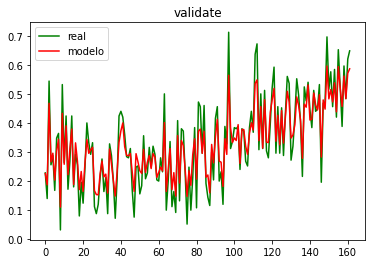

In [113]:
results_0 = modelo.predict(X_train)
plt.plot(range(len(y_train)),y_train,c='g',label='real')
plt.plot(range(len(results_0)),results_0,c='r', label = 'modelo')
plt.title('validate')
plt.legend(loc = 'best')
plt.show()

# Plot data test

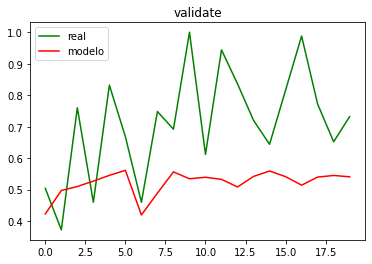

In [114]:
results = modelo.predict(X_test)
plt.plot(range(len(y_test)),y_test,c='g',label='real')
plt.plot(range(len(results)),results,c='r', label = 'modelo')
plt.title('validate')
plt.legend(loc = 'best')
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
mean_squared_error(y_test,results)

0.06047382455999709

Pronóstico Ventas futuras

In [117]:
df.tail()

,s2
ciclo,
188,643.75
189,644.18
190,643.64
191,643.34
192,643.54


In [118]:
# selecciono los últimos 16 dias
ultimos16Dias = df[-20:]
ultimos16Dias

,s2
ciclo,
173,642.97
174,642.64
175,643.61
176,642.86
177,643.79
178,643.38
179,642.86
180,643.58
181,643.44


In [119]:
# escalados
ultimos16Dias = pd.DataFrame(scaler.fit_transform(ultimos16Dias))
ultimos16Dias.columns=['val']
ultimos16Dias

,val
0,0.210191
1,0.000000
2,0.617834
3,0.140127
4,0.732484
5,0.471338
6,0.140127
7,0.598726
8,0.509554
9,1.000000


In [120]:
ultimos16Dias['t-1'] = ultimos16Dias['val'].shift(1)
ultimos16Dias['diff_1'] = ultimos16Dias['val'].diff(1)
ultimos16Dias['MA_4']= ultimos16Dias['val'].rolling(4).mean()
ultimos16Dias['vf'] = ultimos16Dias['val'].shift(-1)
ultimos16Dias['vf2'] = ultimos16Dias['val'].shift(-2)
ultimos16Dias['vf3'] = ultimos16Dias['val'].shift(-3)
ultimos16Dias['vf4'] = ultimos16Dias['val'].shift(-4)
ultimos16Dias['vf5'] = ultimos16Dias['val'].shift(-5)
ultimos16Dias['vf6'] = ultimos16Dias['val'].shift(-6)
ultimos16Dias['vf7'] = ultimos16Dias['val'].shift(-7)
ultimos16Dias=ultimos16Dias.dropna()
ultimos16Dias.head()

,val,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6,vf7
3,0.140127,0.617834,-0.477707,0.242038,0.732484,0.471338,0.140127,0.598726,0.509554,1.000000,0.382166
4,0.732484,0.140127,0.592357,0.372611,0.471338,0.140127,0.598726,0.509554,1.000000,0.382166,0.910828
5,0.471338,0.732484,-0.261146,0.490446,0.140127,0.598726,0.509554,1.000000,0.382166,0.910828,0.738854
6,0.140127,0.471338,-0.331210,0.371019,0.598726,0.509554,1.000000,0.382166,0.910828,0.738854,0.554140
7,0.598726,0.140127,0.458599,0.485669,0.509554,1.000000,0.382166,0.910828,0.738854,0.554140,0.433121


In [121]:
# quitamos la ultima fila para predecirla
ld_train = ultimos16Dias.iloc[:,:-1]
ld_train

,val,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6
3,0.140127,0.617834,-0.477707,0.242038,0.732484,0.471338,0.140127,0.598726,0.509554,1.000000
4,0.732484,0.140127,0.592357,0.372611,0.471338,0.140127,0.598726,0.509554,1.000000,0.382166
5,0.471338,0.732484,-0.261146,0.490446,0.140127,0.598726,0.509554,1.000000,0.382166,0.910828
6,0.140127,0.471338,-0.331210,0.371019,0.598726,0.509554,1.000000,0.382166,0.910828,0.738854
7,0.598726,0.140127,0.458599,0.485669,0.509554,1.000000,0.382166,0.910828,0.738854,0.554140
8,0.509554,0.598726,-0.089172,0.429936,1.000000,0.382166,0.910828,0.738854,0.554140,0.433121
9,1.000000,0.509554,0.490446,0.562102,0.382166,0.910828,0.738854,0.554140,0.433121,0.707006
10,0.382166,1.000000,-0.617834,0.622611,0.910828,0.738854,0.554140,0.433121,0.707006,0.980892
11,0.910828,0.382166,0.528662,0.700637,0.738854,0.554140,0.433121,0.707006,0.980892,0.636943
12,0.738854,0.910828,-0.171975,0.757962,0.554140,0.433121,0.707006,0.980892,0.636943,0.445860


In [122]:
# seleccionamos la última fila (valor más actualizado)
X_test = ld_train.iloc[-1, :].values
X_test

array([ 0.7388535 ,  0.91082803, -0.17197452,  0.75796178,  0.55414013,
        0.43312102,  0.70700637,  0.98089172,  0.63694268,  0.44585987])

In [123]:
# le damos la dimensión de la data con la que fue entrenado el modelo
X_test = X_test.reshape((1,X_test.shape[0]))
X_test.shape

(1, 10)

Función recursiva

In [124]:
# el parametro es el númerod e días a predecir con la última data ingresada

parametro = 7

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[1]-1):
        x_test[0][i] = x_test[0][i+1]
    x_test[0][x_test.shape[1]-1] = nuevoValor
    return x_test
 
results=[]
for i in range(parametro):
    parcial=modelo.predict(X_test)
    results.append(parcial[0])
    print(X_test)
    X_test=agregarNuevoValor(X_test,parcial[0])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[ 0.7388535   0.91082803 -0.17197452  0.75796178  0.55414013  0.43312102
   0.70700637  0.98089172  0.63694268  0.44585987]]
[[ 0.91082803 -0.17197452  0.75796178  0.55414013  0.43312102  0.70700637
   0.98089172  0.63694268  0.44585987  0.46228   ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[-0.17197452  0.75796178  0.55414013  0.43312102  0.70700637  0.98089172
   0.63694268  0.44585987  0.46228     0.49088   ]]
[[0.75796178 0.55414013 0.43312102 0.70700637 0.98089172 0.63694268
  0.44585987 0.46228    0.49088    0.50612   ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[0.55414013 0.43312102 0.70700637 0.98089172 0.63694268 0.44585987
  0.46228    0.49088    0.50612    0.54476   ]]
[[0.43312102 0.70700637 0.98089172 0.63694268 0.44585987 0.46228
  0.49088    0.50612    0.54476    0.49836   ]]
[[0.70700637 0.98089172 0.63694268 0.44585987 0.46228    0.49088
  0.50612    0.54476    0.49836    0.48244   ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [125]:
# convertimos la matriz en lista
adimen = [x for x in results]    

In [126]:
adimen

[0.46227999999998814,
 0.49087999999999,
 0.5061199999999826,
 0.5447599999999955,
 0.49835999999999503,
 0.48243999999998666,
 0.4932399999999922]

In [127]:
type(adimen)

list

In [128]:
# convertimos la lista en array
miarray = np.array(adimen)
miarray

array([0.46228, 0.49088, 0.50612, 0.54476, 0.49836, 0.48244, 0.49324])

In [129]:
# aplicamos escalamiento inverso para obtener los valores originales
inverted = scaler.inverse_transform(miarray.reshape(-1,1))
inverted

array([[643.3657796],
       [643.4106816],
       [643.4346084],
       [643.4952732],
       [643.4224252],
       [643.3974308],
       [643.4143868]])

In [130]:
# ploteando el pronostico
prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre

,pronostico
0,643.365780
1,643.410682
2,643.434608
3,643.495273
4,643.422425
5,643.397431
6,643.414387


In [131]:
total = pd.concat([df[-15:],prediccion1SemanaDiciembre], axis =0)
total

,s2,pronostico
178,643.38,NaN
179,642.86,NaN
180,643.58,NaN
181,643.44,NaN
182,644.21,NaN
183,643.24,NaN
184,644.07,NaN
185,643.80,NaN
186,643.51,NaN
187,643.32,NaN


Plot data test

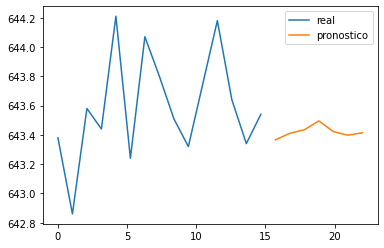

In [132]:
plt.plot(np.linspace(0,len(total),len(total)),total.s2, label ='real')
plt.plot(np.linspace(0,len(total),len(total)),total.pronostico, label ='pronostico')
plt.legend(loc = 'best')